### Importing data

In [1]:
import os
folder_path="/content/Dataset"
os.makedirs(folder_path,exist_ok=True)
print("Folder created at: ",folder_path)

Folder created at:  /content/Dataset


In [6]:
import zipfile
zip_path="/content/SIH_Data_PS-08.zip"
extract_path="/content/Dataset"
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)
print("Unzipped into: ",zip_path)

Unzipped into:  /content/SIH_Data_PS-08.zip


In [7]:
os.listdir(extract_path)

['SIH_Data_Discription.pdf',
 'DATA_GEO_Train.csv',
 'DATA_MEO_Train.csv',
 'DATA_MEO_Train2.csv']

### Creating Residuals

In [9]:
import pandas as pd
df=pd.read_csv('/content/Dataset/DATA_GEO_Train.csv')
df.head()

,utc_time,x_error (m),y_error (m),z_error (m),satclockerror (m)
0,9/1/2025 6:00,5.333443,4.530495,-2.600099,1.280427
1,9/1/2025 8:00,0.222901,0.177056,-0.008267,-3.609894
2,9/1/2025 10:00,0.542796,1.124622,6.286751,-0.419839
3,9/1/2025 12:00,0.164464,0.013855,0.007338,-0.318279
4,9/1/2025 14:00,-0.838448,-0.667825,0.676121,1.428765


In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Dataset/DATA_GEO_Train.csv')
df['residual']=np.sqrt(df['x_error (m)']**2 + df['y_error (m)']**2 + df['z_error (m)']**2 + df['satclockerror (m)']**2)
df.to_csv('/content/Dataset/GEOwithResiduals.csv',index=False)
df1=pd.read_csv('/content/Dataset/DATA_MEO_Train.csv')
df1.rename(columns={'y_error  (m)': "y_error (m)"},inplace=True)
df1['residual']=np.sqrt(df1['x_error (m)']**2 +df1['y_error (m)']**2 +df1['z_error (m)']**2+df1['satclockerror (m)']**2)
df1.to_csv('/content/Dataset/MEOwithResiduals.csv',index=False)
df2=pd.read_csv('/content/Dataset/DATA_MEO_Train2.csv')
df2['residual']=np.sqrt(df2['x_error (m)']**2 + df2['y_error (m)']**2 + df2['z_error (m)']**2 + df2['satclockerror (m)']**2)
df2.to_csv('/content/Dataset/MEO2withResiduals.csv',index=False)

### Checking the Gaussianity of Residuals

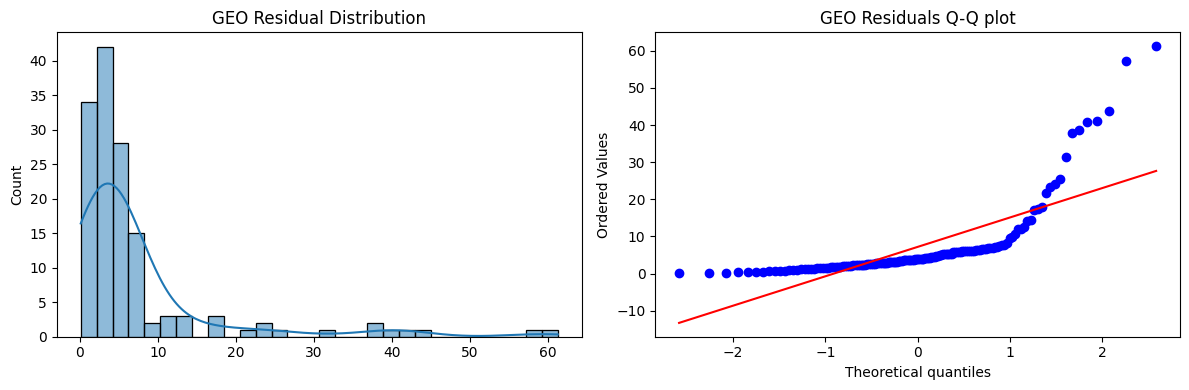

Shapiro-wilk pvalue: 0.0000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('/content/Dataset/GEOwithResiduals.csv')
residuals=df['residual'].dropna().values #dropna() removes all NaN and .values is used to convert the pandas object to numpy array
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30) #KDE stands for Kernel Density Estimation, a probability density curve on top of histogram
#more bins -> more detail but noisier, less bins-> smoother but hide structure
plt.title('GEO Residual Distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt) #Quantile-Quantile plot
#dist='norm' compares residual distribution to a perfect normal distribution
#plot=plt tells in which plotting library to draw the Q-Q plot with
#x-axis is theorotical normal quantiles, y-axis is my residual quantiles, diagonal is the normal line
plt.title('GEO Residuals Q-Q plot')
plt.tight_layout()
plt.show()

shapiro_wilk_p=stats.shapiro(residuals).pvalue #stats.shapiro returns (statistic,pvalue) statistic is how close the data is to normal
#pvalue is probability that residuals come from a normal distribution
print(f"Shapiro-wilk pvalue: {shapiro_wilk_p:.4f}")

INFERENCE: pvalue<0.05 and so GEO data **REJECT Gaussianity**

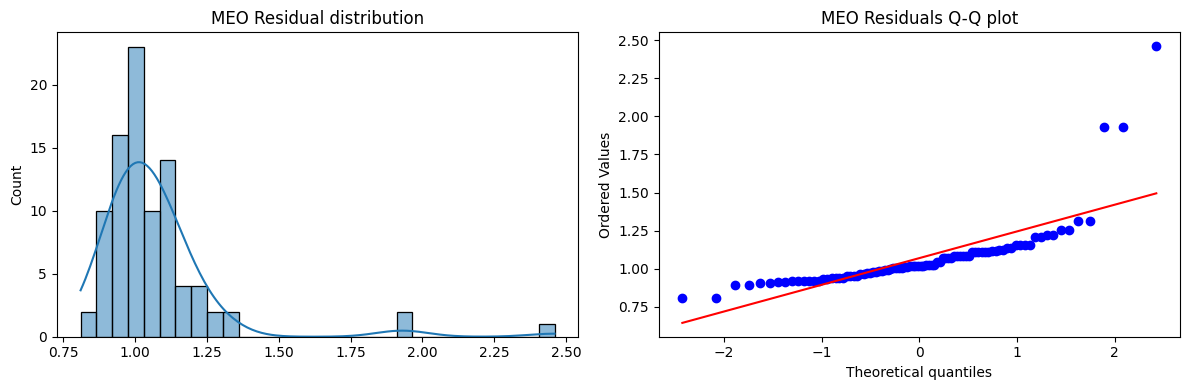

Shapiro-wilk pvalue: 0.0000


In [17]:
df=pd.read_csv('/content/Dataset/MEOwithResiduals.csv')
residuals=df['residual'].dropna().values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30)
plt.title('MEO Residual distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('MEO Residuals Q-Q plot')
plt.tight_layout()
plt.show()
shapiro_wilk_p=stats.shapiro(residuals).pvalue
print(f"Shapiro-wilk pvalue: {shapiro_wilk_p:.4f}")

INFERENCE: p<0.05 MEO **REJECT Gaussianity**

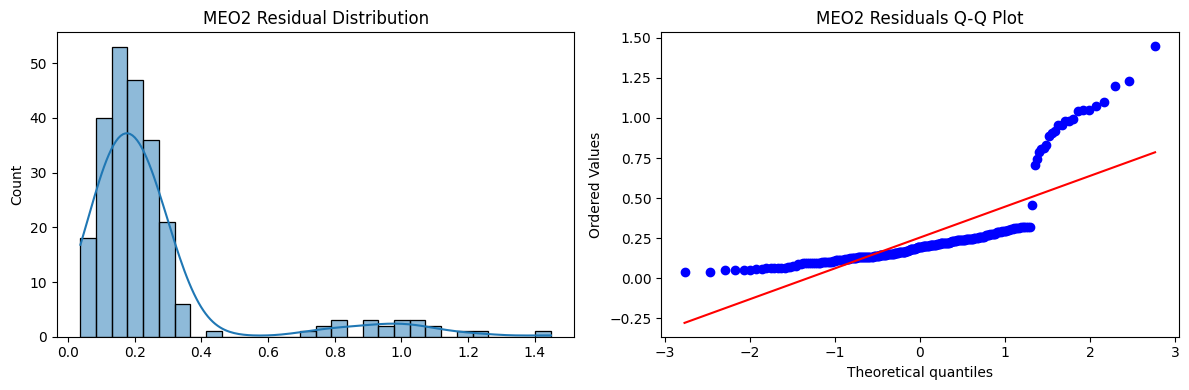

Shapiro-wilk pvalue: 0.0000


In [18]:
df=pd.read_csv('/content/Dataset/MEO2withResiduals.csv')
residuals=df['residual'].dropna().values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30)
plt.title('MEO2 Residual Distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('MEO2 Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

shapiro_wilk_pvalue=stats.shapiro(residuals).pvalue
print(f"Shapiro-wilk pvalue: {shapiro_wilk_pvalue:.4f}")

INFERENCE: p<0.05 MEO2 **REJECT Gaussianity**